# Hyper parameters

In [ ]:
EPOCHS = 250
BATCH_SIZE = 256
LEARNING_RATE = 0.001

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import os


In [2]:
# Get list of files in collected_data folder
files = os.listdir('collected_data')
files

['aalborg_3_3_0.csv',
 'alpine1_3_8_0.csv',
 'alpine2_3_10_0.csv',
 'aspeedway_3_3_0.csv',
 'aspeedway_3_8_0.csv',
 'brondehach_3_10_0.csv',
 'cgspeedwaynumber1_3_10_0.csv',
 'cgtrack2_3_10_0.csv',
 'cgtrack3_3_3_0.csv',
 'corkscrew_3_10_0.csv',
 'cspeedway_3_5_0.csv',
 'dspeedway_3_10_0.csv',
 'eroad_3_5_0.csv',
 'espeedway_3_2_0.csv',
 'etrack3_3_9_0.csv',
 'etrack4_3_5_0.csv',
 'etrack5_3_6_0.csv',
 'etrack6_3_8_0.csv',
 'forza_3_7_0.csv',
 'fspeedway_3_2_0.csv',
 'gspeedway_3_5_0.csv',
 'michiganspeedway_3_9_0.csv',
 'olethrosroad1_3_3_0.csv',
 'ruudskogen_3_7_0.csv',
 'spring_1_4_0.csv',
 'street1_3_5_0.csv',
 'wheel1_3_6_0.csv',
 'wheel2_3_7_0.csv']

In [3]:
# Merge all csv files from collected_data folder
df = pd.read_csv(f"collected_data/{files[0]}")
df.head()

,Angle,CurrentLapTime,Damage,DistanceFromStart,DistanceCovered,FuelLevel,Gear,LastLapTime,Opponent_1,Opponent_2,...,WheelSpinVelocity_1,WheelSpinVelocity_2,WheelSpinVelocity_3,WheelSpinVelocity_4,Z,Acceleration,Braking,Clutch,Gear,Steering
0,0.001991,-0.982,0.0,2542.53,0.0,94.0000,0,0.0,30.1827,10.8396,...,0.0,0.0,0.0,0.0,0.345289,1.0,0.0,0.64,1,0.012217
1,0.001991,-0.962,0.0,2542.53,0.0,94.0000,0,0.0,30.1827,10.8396,...,0.0,0.0,0.0,0.0,0.345289,1.0,0.0,0.64,1,0.012217
2,0.001991,-0.942,0.0,2542.53,0.0,93.9999,0,0.0,30.1827,10.8396,...,0.0,0.0,0.0,0.0,0.345289,1.0,0.0,0.64,1,0.012217
3,0.001991,-0.922,0.0,2542.53,0.0,93.9998,0,0.0,30.1827,10.8396,...,0.0,0.0,0.0,0.0,0.345289,1.0,0.0,0.64,1,0.012217
4,0.001991,-0.902,0.0,2542.53,0.0,93.9997,0,0.0,30.1827,10.8396,...,0.0,0.0,0.0,0.0,0.345289,1.0,0.0,0.64,1,0.012217


In [4]:
len(df)

12738

In [5]:
for file in files[1:]:
    df = df.append(pd.read_csv(f'collected_data/{file}'), ignore_index=True)

C:\Users\sam_y\AppData\Local\Temp\ipykernel_19000\2414074000.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(f'collected_data/{file}'), ignore_index=True)
C:\Users\sam_y\AppData\Local\Temp\ipykernel_19000\2414074000.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(f'collected_data/{file}'), ignore_index=True)
C:\Users\sam_y\AppData\Local\Temp\ipykernel_19000\2414074000.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(f'collected_data/{file}'), ignore_index=True)
C:\Users\sam_y\AppData\Local\Temp\ipykernel_19000\2414074000.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [6]:
len(df)

330043

In [7]:
df.columns

Index(['Angle', ' CurrentLapTime', ' Damage', ' DistanceFromStart',
       ' DistanceCovered', ' FuelLevel', ' Gear', ' LastLapTime',
       ' Opponent_1', 'Opponent_2', 'Opponent_3', 'Opponent_4', 'Opponent_5',
       'Opponent_6', 'Opponent_7', 'Opponent_8', 'Opponent_9', 'Opponent_10',
       'Opponent_11', 'Opponent_12', 'Opponent_13', 'Opponent_14',
       'Opponent_15', 'Opponent_16', 'Opponent_17', 'Opponent_18',
       'Opponent_19', 'Opponent_20', 'Opponent_21', 'Opponent_22',
       'Opponent_23', 'Opponent_24', 'Opponent_25', 'Opponent_26',
       'Opponent_27', 'Opponent_28', 'Opponent_29', 'Opponent_30',
       'Opponent_31', 'Opponent_32', 'Opponent_33', 'Opponent_34',
       'Opponent_35', 'Opponent_36', 'RacePosition', ' RPM', ' SpeedX',
       ' SpeedY', ' SpeedZ', ' Track_1', 'Track_2', 'Track_3', 'Track_4',
       'Track_5', 'Track_6', 'Track_7', 'Track_8', 'Track_9', 'Track_10',
       'Track_11', 'Track_12', 'Track_13', 'Track_14', 'Track_15', 'Track_16',
       'T

# Prepare PyTorch Data

In [8]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [9]:
df.columns

Index(['Angle', ' CurrentLapTime', ' Damage', ' DistanceFromStart',
       ' DistanceCovered', ' FuelLevel', ' Gear', ' LastLapTime',
       ' Opponent_1', 'Opponent_2', 'Opponent_3', 'Opponent_4', 'Opponent_5',
       'Opponent_6', 'Opponent_7', 'Opponent_8', 'Opponent_9', 'Opponent_10',
       'Opponent_11', 'Opponent_12', 'Opponent_13', 'Opponent_14',
       'Opponent_15', 'Opponent_16', 'Opponent_17', 'Opponent_18',
       'Opponent_19', 'Opponent_20', 'Opponent_21', 'Opponent_22',
       'Opponent_23', 'Opponent_24', 'Opponent_25', 'Opponent_26',
       'Opponent_27', 'Opponent_28', 'Opponent_29', 'Opponent_30',
       'Opponent_31', 'Opponent_32', 'Opponent_33', 'Opponent_34',
       'Opponent_35', 'Opponent_36', 'RacePosition', ' RPM', ' SpeedX',
       ' SpeedY', ' SpeedZ', ' Track_1', 'Track_2', 'Track_3', 'Track_4',
       'Track_5', 'Track_6', 'Track_7', 'Track_8', 'Track_9', 'Track_10',
       'Track_11', 'Track_12', 'Track_13', 'Track_14', 'Track_15', 'Track_16',
       'T

In [10]:
x_columns = [
    "Angle",
    " DistanceCovered",  # Distance raced
    " Opponent_1", "Opponent_2", "Opponent_3", "Opponent_4", "Opponent_5", "Opponent_6", "Opponent_7", "Opponent_8", "Opponent_9", "Opponent_10", "Opponent_11", "Opponent_12", "Opponent_13", "Opponent_14", "Opponent_15", "Opponent_16", "Opponent_17", "Opponent_18", "Opponent_19", "Opponent_20", "Opponent_21", "Opponent_22", "Opponent_23", "Opponent_24", "Opponent_25", "Opponent_26", "Opponent_27", "Opponent_28", "Opponent_29", "Opponent_30", "Opponent_31", "Opponent_32", "Opponent_33", "Opponent_34", "Opponent_35", "Opponent_36",
    " RPM",
    " SpeedX",
    " SpeedY",
    " SpeedZ",
    " Track_1", "Track_2", "Track_3", "Track_4", "Track_5", "Track_6", "Track_7", "Track_8", "Track_9", "Track_10", "Track_11", "Track_12", "Track_13", "Track_14", "Track_15", "Track_16", "Track_17", "Track_18", "Track_19",
    "TrackPosition",
    " WheelSpinVelocity_1",
    "WheelSpinVelocity_2",
    "WheelSpinVelocity_3",
    "WheelSpinVelocity_4",
    "Z",
]
y_columns = [" Acceleration", "Braking", "Steering"]

In [11]:
# Select relevant columns for features and target
features = df[x_columns]
targets = df[y_columns]

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).to(device)


In [12]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [13]:
X_train.shape[1], y_train.shape[1]

(67, 3)

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.fc6 = nn.Linear(8, output_size)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x
    
model = Model(X_train.shape[1], y_train.shape[1]).to(device)
print(X_train.shape[1], y_train.shape[1])
    

67 3


In [15]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 250

train_loss = []
test_losses = []
test_r2 = []

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_loss.append(epoch_loss)

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())
        test_r2.append(r2_score(y_test.cpu().numpy(), test_outputs.cpu().numpy()))
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss}, Test Loss: {test_loss.item()}, Test R2: {test_r2[-1]}')

  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 1/250, Train Loss: 0.05525660816067469, Val Loss: 0.030579622834920883, Val R2: 0.4428989964731391
Epoch 2/250, Train Loss: 0.026174350301446322, Val Loss: 0.023691434413194656, Val R2: 0.5409922448691858
Epoch 3/250, Train Loss: 0.02068723130487483, Val Loss: 0.02002212405204773, Val R2: 0.6072869167080138
Epoch 4/250, Train Loss: 0.016542695186555732, Val Loss: 0.016672750934958458, Val R2: 0.6816974098988515
Epoch 5/250, Train Loss: 0.014165445108620032, Val Loss: 0.013847594149410725, Val R2: 0.7337564573350269
Epoch 6/250, Train Loss: 0.012875535677894661, Val Loss: 0.013407017104327679, Val R2: 0.7478349564890605
Epoch 7/250, Train Loss: 0.012074246636209216, Val Loss: 0.012800510972738266, Val R2: 0.7472705635640122
Epoch 8/250, Train Loss: 0.011345312785350017, Val Loss: 0.01196694653481245, Val R2: 0.7673546506681932
Epoch 9/250, Train Loss: 0.010912133115452043, Val Loss: 0.011879303492605686, Val R2: 0.7732130705627082
Epoch 10/250, Train Loss: 0.010433932496938681, Va

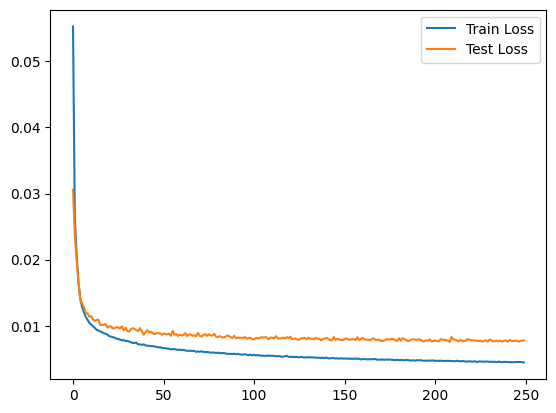

In [16]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

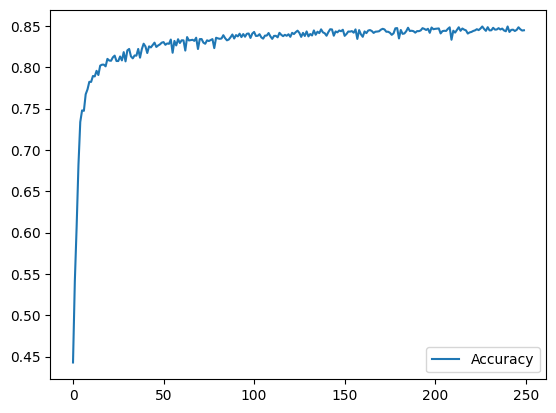

In [17]:
plt.plot(test_r2, label='Accuracy')
plt.legend()
plt.show()

In [18]:
#save model

torch.save(model.state_dict(), 'model.pth')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#load model
model = Model(X_train.shape[1], y_train.shape[1]).to(device)
model.load_state_dict(torch.load('model.pth'))  


<All keys matched successfully>